In [3]:
import sklearn
from sklearn.model_selection import train_test_split

In [4]:
# 1. Import dataset and display first 5 rows
import pandas as pd
df=pd.read_csv("/home/user/Downloads/tvmarketing.csv")
print(df.head(5))

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [5]:
# 2. Check column data types
print(df.dtypes)

TV       float64
Sales    float64
dtype: object


In [6]:
# 3. Check the shape of the Data Frame (rows, columns)
print(df.shape)

(200, 2)


In [7]:
#4. Look at summary statistics
print(df.describe())

               TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000


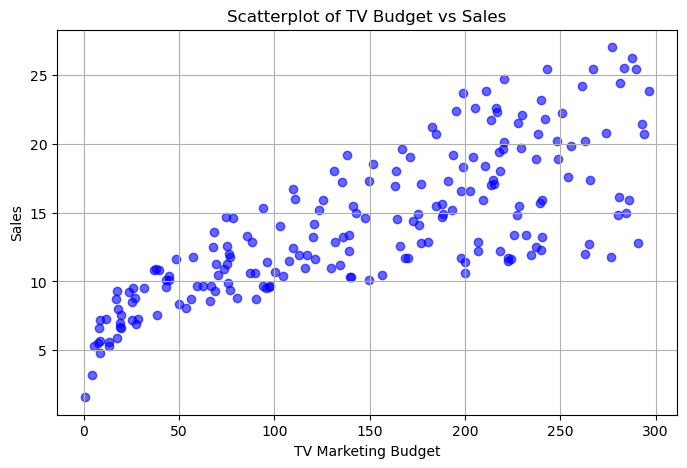

In [8]:
#5. Visualize the relationship between the features and the dependent variable using scatterplots
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df['TV'], df['Sales'], color='blue', alpha=0.6)
plt.title("Scatterplot of TV Budget vs Sales")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


In [9]:
#6. Prepare X (feature variables) and y (response variable)
# X should be a DataFrame; y can be a Series
X = df[['TV']]
y = df['Sales']


In [10]:
#7. Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)


In [11]:
#8. Print the shape of train data and test data
 
print("\nData split:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



Data split:
X_train shape: (140, 1)
X_test shape: (60, 1)
y_train shape: (140,)
y_test shape: (60,)


In [12]:
#9.Perform Linear Regression (on train data) without using any library and print the coefficients values
import numpy as np

# Convert training data to numpy arrays
X_train_np = X_train.values.flatten()  # flatten to 1D array
y_train_np = y_train.values

# Calculate means
mean_x = np.mean(X_train_np)
mean_y = np.mean(y_train_np)

# Calculate slope (b1)
numerator = np.sum((X_train_np - mean_x) * (y_train_np - mean_y))
denominator = np.sum((X_train_np - mean_x)**2)
b1 = numerator / denominator

# Calculate intercept (b0)
b0 = mean_y - b1 * mean_x

print("\nManual Linear Regression Coefficients:")
print("Intercept (b0):", b0)
print("Slope (b1):", b1)



Manual Linear Regression Coefficients:
Intercept (b0): 7.2394598307511355
Slope (b1): 0.04640780212815278


In [13]:
#10.Create the model using the calculated coefficients and make predictions on the testing set
# Make predictions on X_test manually
X_test_np = X_test.values.flatten()
y_pred_manual = b0 + b1 * X_test_np

print("\nManual Predictions on Testing Set:")
print(y_pred_manual[:5])  # display first 5 predictions



Manual Predictions on Testing Set:
[14.81785392 16.30754437 20.83230507  7.78243112 17.46309864]


In [14]:
#11.Perform Linear Regression using library(sklearn)
from sklearn.linear_model import LinearRegression

# Create and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [15]:
#12.Print the intercept and coefficients
print("\nscikit-learn Linear Regression Coefficients:")
print("Intercept:", lr.intercept_)
print("Coefficient for TV:", lr.coef_[0])



scikit-learn Linear Regression Coefficients:
Intercept: 7.23945983075114
Coefficient for TV: 0.04640780212815275


In [16]:
#13.Make predictions on the testing set - y_pred
y_pred = lr.predict(X_test)
print("\nscikit-learn Predictions on Testing Set:")
print(y_pred[:5])



scikit-learn Predictions on Testing Set:
[14.81785392 16.30754437 20.83230507  7.78243112 17.46309864]


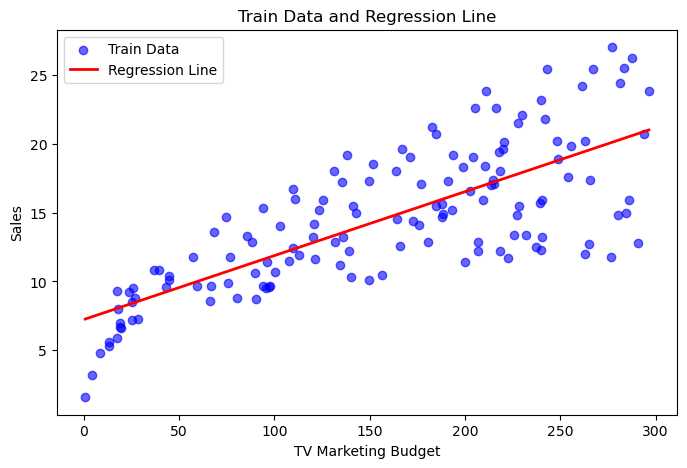

In [17]:
#14.Plot train data and the model
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', alpha=0.6, label="Train Data")
# Create points for the regression line
x_line = np.linspace(X_train['TV'].min(), X_train['TV'].max(), 100)
y_line = lr.intercept_ + lr.coef_[0] * x_line
plt.plot(x_line, y_line, color='red', linewidth=2, label="Regression Line")
plt.title("Train Data and Regression Line")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.legend()
plt.show()


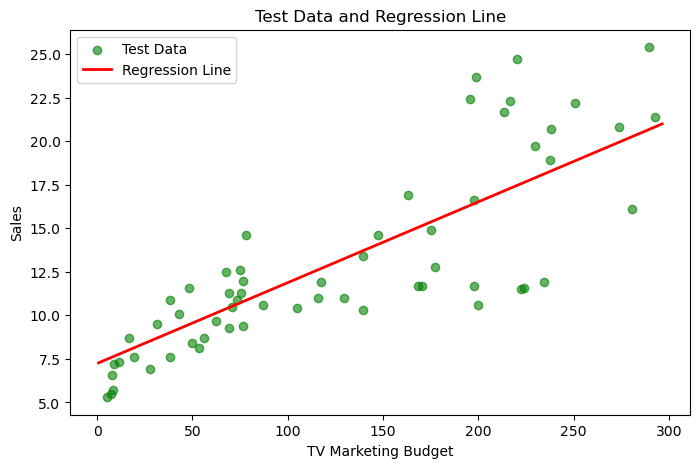

In [18]:
#15.Plot test data and the model
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color='green', alpha=0.6, label="Test Data")
plt.plot(x_line, y_line, color='red', linewidth=2, label="Regression Line")
plt.title("Test Data and Regression Line")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.legend()
plt.show()


In [19]:
#16.Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation (scikit-learn):")
print("Mean Squared Error (MSE):", mse)
print("R Squared:", r2)



Model Evaluation (scikit-learn):
Mean Squared Error (MSE): 8.970991242413616
R Squared: 0.6714477229302764


In [20]:
#17.Calculate and print R Squared and Adjusted R Squared values without any library
# Convert test data and predictions to numpy arrays (if not already)
y_test_np = y_test.values
n = len(y_test_np)
p = 1

# Calculate R Squared manually
ss_total = np.sum((y_test_np - np.mean(y_test_np))**2)
ss_res = np.sum((y_test_np - y_pred)**2)
r_squared_manual = 1 - (ss_res/ss_total)

# Calculate Adjusted R Squared
adjusted_r_squared = 1 - (1 - r_squared_manual) * (n - 1) / (n - p - 1)

print("\nManual Evaluation:")
print("Manual R Squared:", r_squared_manual)
print("Manual Adjusted R Squared:", adjusted_r_squared)



Manual Evaluation:
Manual R Squared: 0.6714477229302764
Manual Adjusted R Squared: 0.6657830284980398
